# Chapter 6: Visualization

## Introducing the Basics of Matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Curve plotting

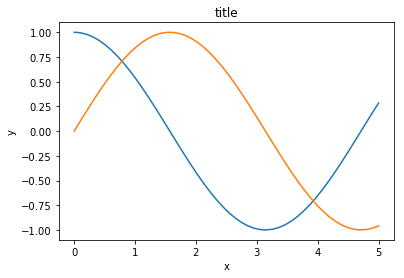

In [5]:
# Curve plotting
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 50)
y_cos = np.cos(x)
y_sin = np.sin(x)

plt.figure() # initialize a figure
plt.plot(x,y_cos) # plot series of coordinates as a line
plt.plot(x,y_sin)
plt.xlabel('x') # adds label to x axis
plt.ylabel('y') # adds label to y axis
plt.title('title') # adds a title
plt.show() # close a figure


In [6]:
#rcParams['axes.color_cycle'] = ['red', 'blue', 'green']

### Using panels

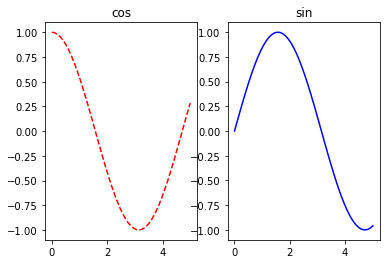

In [7]:
# Using panels
import matplotlib.pyplot as plt
plt.subplot(1,2,1) # defines 1 row 2 column panel, activates figure 1
plt.plot(x,y_cos,'r--')
plt.title('cos') # adds a title
plt.subplot(1,2,2) # defines 1 row 2 column panel, activates figure 2
plt.plot(x,y_sin,'b-')
plt.title('sin') 
plt.show()

# Some references for further personalizations:
# http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle
# http://matplotlib.org/api/colors_api.html
# http://matplotlib.org/api/markers_api.html
# http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D

# It is possible to have customer colors by RGB values (in range [0-1])
# plt.plot(x,y_sin,'b-',color = (0.1,0.9,0.9))
# The curve's color will be cyan

### Scatterplots

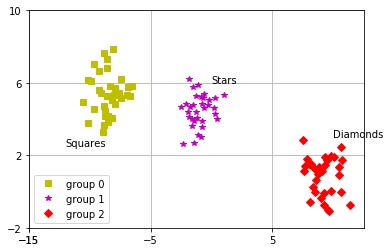

In [8]:
# Scatterplot
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

D = make_blobs(n_samples=100, n_features=2, centers=3, random_state=7)
groups = D[1]
coordinates = D[0]

plt.plot(coordinates[groups==0,0], coordinates[groups==0,1], 'ys', label='group 0') # yellow square
plt.plot(coordinates[groups==1,0], coordinates[groups==1,1], 'm*', label='group 1') # magenta stars
plt.plot(coordinates[groups==2,0], coordinates[groups==2,1], 'rD', label='group 2') # red diamonds
plt.ylim(-2,10) # redefines the limits of y axis
plt.yticks([10,6,2,-2]) # redefines y axis ticks
plt.xticks([-15,-5,5,-15]) # redefines x axis ticks
plt.grid() # adds a grid
plt.annotate('Squares', (-12,2.5)) # prints text at coordinates
plt.annotate('Stars', (0,6))
plt.annotate('Diamonds', (10,3))
plt.legend(loc='lower left', numpoints= 1) # places a legend of labelled items
plt.show()

### Histograms

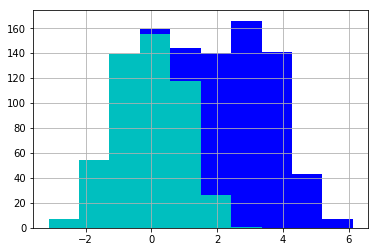

In [9]:
# Histograms
import numpy as np
import matplotlib.pyplot as plt
x = np.random.normal(loc=0.0, scale=1.0, size=500)
z = np.random.normal(loc=3.0, scale=1.0, size=500)
plt.hist(np.column_stack((x,z)), bins=10, histtype='bar', color = ['c','b'], stacked=True)
plt.grid()
plt.show()

# Also try these further parameters for plt.hist
# normed=1
# histtype='step'
# stacked = False
# fill = False

### Bar graphs

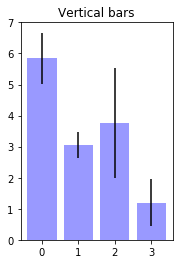

In [17]:
# Bar graphs
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
average = np.mean(iris.data, axis=0) 
std     = np.std(iris.data, axis=0) 
range_  = range(np.shape(iris.data)[1])

plt.figure(1)
plt.subplots(121) # defines 1 row 2 column panel, activates figure 1
plt.title('Horizontal bars')
plt.barh(range_,average, color="r", xerr=std, alpha=0.4, align="center")
plt.yticks(range_, iris.feature_names)
plt.subplot(122) # defines 1 row 2 column panel, activates figure 2
plt.title('Vertical bars')
plt.bar(range_,average, color="b", yerr=std, alpha=0.4, align="center")
plt.xticks(range_, range_)
plt.show()

### Image visualization

In [19]:
# Image visualization: Olivetti dataset
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_olivetti_faces(shuffle=True, random_state=5)
photo = 1
for k in range(6):
    plt.subplot(2,3,k)
    plt.imshow(dataset.data[k].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('subject '+str(dataset.target[k]))
    plt.axis('off')
plt.show()

ValueError: num must be 1 <= num <= 6, not 0

In [ ]:
# Image visualization: handwritten digits
from sklearn.datasets import load_digits
digits = load_digits()
for number in range(1,10):
    plt.subplot(3, 3, number)
    plt.imshow(digits.images[number],cmap='binary',interpolation='none', extent=[0,8,0,8])
    plt.grid()
plt.show()

In [ ]:
# Image visualization: handwritten digits, a close up 
# (not included in the book)
plt.imshow(digits.images[0],cmap='binary',interpolation='none', extent=[0,8,0,8])
# Extent defines the images max and min of the horizontal and vertical values
plt.grid()
plt.show()

## Selected Graphical Examples with pandas

In [ ]:
import pandas as pd
print  'Your pandas version is: %s' % pd.__version__
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
groups = list(iris.target)
iris_df['groups'] = pd.Series([iris.target_names[k] for k in groups])

### Boxplots and histograms

In [ ]:
boxplots = iris_df.boxplot(return_type='axes')

In [ ]:
boxplots = iris_df.boxplot(column='sepal length (cm)', by='groups', return_type='axes')

In [ ]:
densityplot = iris_df.plot(kind='density')

In [ ]:
single_distribution = iris_df['petal width (cm)'].plot(kind='hist', alpha=0.5)

### Scatterplots

In [ ]:
colors_palette = {0: 'red', 1: 'yellow', 2:'blue'}
colors = [colors_palette[c] for c in groups]
simple_scatterplot = iris_df.plot(kind='scatter', x=0, y=1, c=colors)

In [ ]:
hexbin = iris_df.plot(kind='hexbin', x=0, y=1, gridsize=10)

In [ ]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0: "red", 1: "green", 2: "blue"}
colors = [colors_palette[c] for c in groups]   
matrix_of_scatterplots = scatter_matrix(iris_df, alpha=0.2, figsize=(6, 6), color=colors, diagonal='kde')

### Parallel coordinates

In [ ]:
from pandas.tools.plotting import parallel_coordinates
iris_df['groups'] = [iris.target_names[k] for k in groups]
pll = parallel_coordinates(iris_df,'groups')

## Advanced Data Learning Representation

### Learning curves

In [ ]:
# Learning curve
import numpy as np
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
digits = load_digits()
X, y = digits.data, digits.target
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_size, train_scores, test_scores = learning_curve(hypothesis, X, y, train_sizes=np.linspace(0.1,1.0,5), 
                                                       cv=10, scoring='accuracy', exploit_incremental_learning=False, n_jobs=-1)
mean_train  = np.mean(train_scores,axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test   = np.mean(test_scores,axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.plot(train_size,mean_train,'ro-', label='Training')
plt.fill_between(train_size, upper_train, lower_train, alpha=0.1, color='r')
plt.plot(train_size,mean_test,'bo-', label='Cross-validation')
plt.fill_between(train_size, upper_test, lower_test, alpha=0.1, color='b')
plt.grid()
plt.xlabel('sample size') # adds label to x axis
plt.ylabel('accuracy') # adds label to y axis
plt.legend(loc='lower right', numpoints= 1)
plt.show()

### Validation curves

In [ ]:
# Validation curves
from sklearn.learning_curve import validation_curve
testing_range = np.logspace(-5,2,8)
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_scores, test_scores = validation_curve(hypothesis, X, y, 'alpha', param_range=testing_range, cv=10, scoring='accuracy', n_jobs=-1)
mean_train  = np.mean(train_scores,axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test   = np.mean(test_scores,axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.semilogx(testing_range,mean_train,'ro-', label='Training')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')
plt.semilogx(testing_range,mean_test,'bo-', label='Cross-validation')
plt.fill_between(testing_range, upper_test, lower_test, alpha=0.1, color='b')
plt.grid()
plt.xlabel('alpha parameter') # adds label to x axis
plt.ylabel('accuracy') # adds label to y axis
plt.ylim(0.8,1.0)
plt.legend(loc='lower left', numpoints= 1)
plt.show()

### Feature importance

In [ ]:
# Importance of variables
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
feature_names = np.array([' '.join([str(b), a]) for a,b in zip(boston.feature_names,range(len(boston.feature_names)))])
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, random_state=101).fit(X, y)
importance = np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("Random Forest importance")
plt.barh(range_,importance[indices],
       color="r", xerr=std[indices], alpha=0.4, align="center")
plt.yticks(range(len(importance)), feature_names[indices])
plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()

### GBT partial dependence plot

In [ ]:
#  Partial dependence plots based on GBM
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
GBM = GradientBoostingRegressor(n_estimators=100, random_state=101).fit(X, y)
features = [5,12,(5,12)]
fig, axs = plot_partial_dependence(GBM, X, features, feature_names=feature_names) 